# Multidimensional Calibration Comparison

Goal: To compare two calibrations (corrections) at different points in impedance space

Method:
1. Create a set of "synthetic" ~~standards~~ DUTs in the DUT reference plane (rename to DUTs). These standards should have the following properties:
        + Occupy many points in impedance space
        + Be constant as a function of frequency
        + Be spaced further apart than the mean error
2. Use the reference (calibration with lowest uncertainty) to move the points to the measurement plane. This can be thought of uncorrecting the data
3. Use the comparison calibration to move the points from the measurement plane to the reference plane
4. Color code the points based on their distance from the original points 


In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds


In [2]:
# first choose the points
r1=.98
r2=.2
r3=.6
def create_synthetic_standards_DUT_plane(frequency_list,r1,r2,r3,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        output_list.append(S2PV1(sparameter_complex=data_list,option_line='# GHz S RI R 50'))
    return output_list
            
def create_synthetic_standards_measurement_plane(r1,r2,r3,s4p,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    frequency_list=s4p["Frequency"]
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        measurement_data_list=uncorrect_sparameters_sixteen_term(sparameters_complex=data_list,
                                           sixteen_term_correction=s4p.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=measurement_data_list,option_line='# GHz S RI R 50'))
    return output_list
        

In [3]:
def correct_all_sixteen_term(s2p_list,correction):
    """Corrects all s2ps in list and returns a new list of corrected DUTs"""
    output_list=[]
    for s2p in s2p_list:
        corrected_s2p=correct_sparameters_sixteen_term(sparameters_complex=s2p.sparameter_complex,
                                                       sixteen_term_correction=correction.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=corrected_s2p))
    return output_list


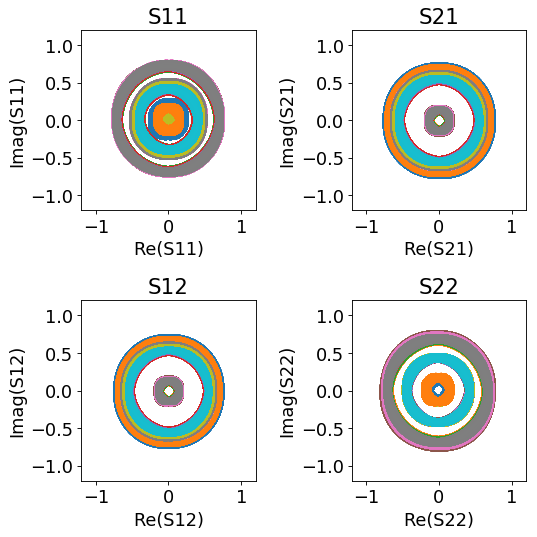

In [4]:
reference_correction=SNP(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160822\Solution_0.s4p")
measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,reference_correction)
plt.rcParams.update({'font.size': 16})
map(lambda x: x.change_data_format("RI"),measurement_plane_s2ps)
s2ps=measurement_plane_s2ps
fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
plot_names=["S11","S21","S12","S22"]
for s2p in s2ps:
    for index,ax in enumerate(axes.flat):
        ax.plot(s2p["re{0}".format(plot_names[index])],
                s2p["im{0}".format(plot_names[index])],'x');
        ax.set_ylim([-1.2,1.2]);
        ax.set_xlim([-1.2,1.2]);
        ax.set_title(plot_names[index]);
        ax.set_xlabel("Re({0})".format(plot_names[index]))
        ax.set_ylabel("Imag({0})".format(plot_names[index]))
plt.tight_layout()
plt.show()

In [5]:
def two_port_complex_plot(s2p_list,**options):
    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    for s2p in s2p_list:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'o',fillstyle='none',markersize=10);
            ax.set_ylim([-1.2,1.2]);
            ax.set_xlim([-1.2,1.2]);
            ax.set_title(plot_names[index]);
            ax.set_xlabel("Re({0})".format(plot_names[index]))
            ax.set_ylabel("Imag({0})".format(plot_names[index]))
    plt.tight_layout()
    plt.show()

In [8]:
comparison_correction=SNP(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160825\Solution_0.s4p")
comparison_correction_2=SNP(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160826\Solution_0.s4p")

In [11]:
comparison_correction_list=[]
dates=["20160822","20160824","20160825",
      "20160826","20160914","20160915",
      "20160916","20160919","20160920",
      "20160921","20160923","20160926"]
cal_names=["cal1","cal2"]
for date in dates:
    cal_list=[]
    for cal in cal_names:
        correction=SNP(r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p".format(date,cal))
        cal_list.append(correction)
    comparison_correction_list.append(cal_list)

In [12]:
def two_port_complex_plot_compare(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)
    defaults={"format":"MA",
          "display_legend":True,
          "save_plot":False,
          "directory":None,
          "specific_descriptor":"Calibration_Comparison",
          "general_descriptor":"Plot",
          "file_name":None,
          "labels":None,
          "title":None}
    comparison_plot_options={}
    for key,value in defaults.iteritems():
        comparison_plot_options[key]=value
    for key,value in options.iteritems():
        comparison_plot_options[key]=value


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]

    for s2p in s2p_list_2:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'bx');
            ax.set_ylim([-1.1,1.1]);
            ax.set_xlim([-1.1,1.1]);
            ax.set_title(plot_names[index]);
            #ax.set_xlabel("Re({0})".format(plot_names[index]))
            #ax.set_ylabel("Imag({0})".format(plot_names[index]))
    for s2p in s2p_list_1:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'yo',fillstyle='none',markersize=10);
            ax.set_ylim([-1.1,1.1]);
            ax.set_xlim([-1.1,1.1]);
            ax.set_title(plot_names[index]);
    if comparison_plot_options["title"]:
        fig.suptitle(comparison_plot_options["title"])
    fig.subplots_adjust(hspace=0)
    plt.tight_layout()
    # Dealing with the save option
    if comparison_plot_options["file_name"] is None:
        file_name=auto_name(specific_descriptor=comparison_plot_options["specific_descriptor"],
                            general_descriptor=comparison_plot_options["general_descriptor"],
                            directory=comparison_plot_options["directory"],
                            extension='png',padding=3)
    else:
        file_name=comparison_plot_options["file_name"]
    if comparison_plot_options["save_plot"]:
        #print file_name
        plt.savefig(os.path.join(comparison_plot_options["directory"],file_name))
    else:
        plt.show()
    return fig


In [ ]:
def calculate_mean_normalized_calibration_difference(synthetic_DUT_s2p_list,comparison_DUT_s2p_list,**options):
    """Calculates the mean of the difference normalized to the """

In [17]:
def compare_calibrations_script(c1,c2,**options):
    """"""
    defaults={"format":"MA",
      "display_legend":True,
      "save_plot":False,
      "directory":None,
      "specific_descriptor":"Calibration_Comparison",
      "general_descriptor":"Plot",
      "file_name":None,
      "labels":None,
      "title":None}
    comparison_plot_options={}
    for key,value in defaults.iteritems():
        comparison_plot_options[key]=value
    for key,value in options.iteritems():
        comparison_plot_options[key]=value
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare(s2p_list,comparison_s2ps_dut_plane,**comparison_plot_options)

In [16]:
for date_index,date in enumerate(dates[:]):
    for cal_index,cal in enumerate(cal_names):
        
        compare_calibrations_script(reference_correction,comparison_correction_list[date_index][cal_index],
                                title=date+" "+cal,save_plot=True,
                                directory=r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\Analysis\Cal compare by date 2",
                                specific_descriptor=date+"_"+cal+"compare")
        plt.close()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [9]:
comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,comparison_correction)
comparison_s2ps_dut_plane_2=correct_all_sixteen_term(measurement_plane_s2ps,comparison_correction_2)

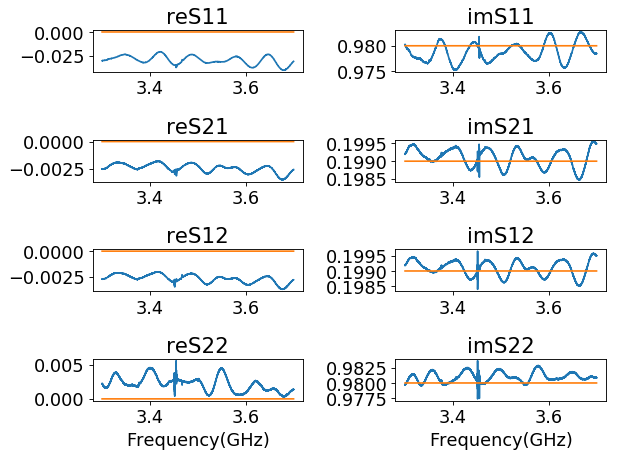

In [12]:
dut_plane_s2ps=create_synthetic_standards_DUT_plane(reference_correction["Frequency"],r1,r2,r3)
compare_s2p_plots([comparison_s2ps_dut_plane[2],dut_plane_s2ps[2]],display_legend=False,format="RI");

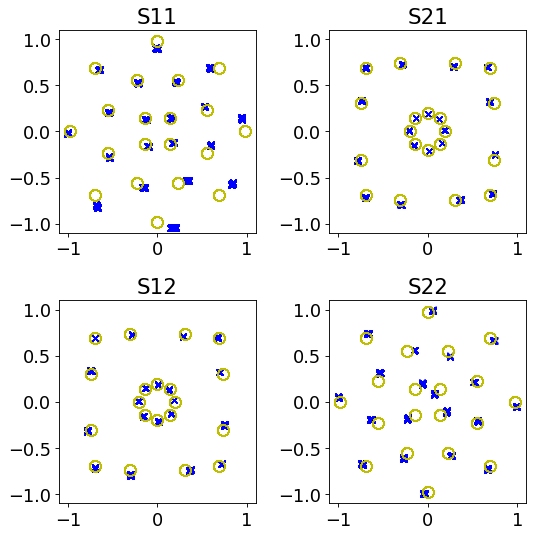

In [16]:
two_port_complex_plot_compare(dut_plane_s2ps,comparison_s2ps_dut_plane_2)

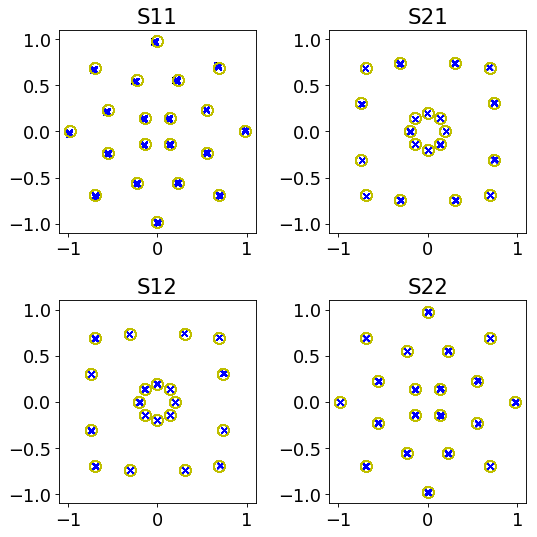

In [17]:
two_port_complex_plot_compare(dut_plane_s2ps,comparison_s2ps_dut_plane)

In [99]:
def compare_calibrations_script(c1_path,c2_path,**options):
    """"""
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare(s2p_list,comparison_s2ps_dut_plane)
    


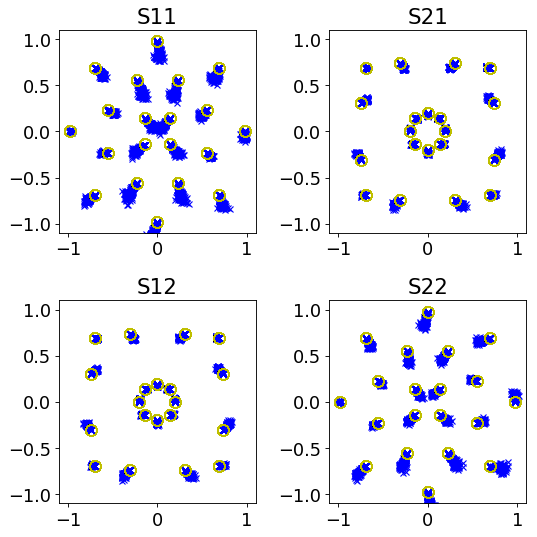

In [100]:

c1_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_To50ohm_AtRefHalfThru_0.s4p"
c2_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)

In [209]:
%matplotlib wx
import matplotlib.animation as animation
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [101]:
def two_port_complex_plot_compare_animate(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    images=[]
    frequency_list=s2p_list_2[0]["Frequency"]
    for f_index,f in enumerate(frequency_list):
    
        for s2p in s2p_list_2:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'bx');
                ax.set_ylim([-1.1,1.1]);
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]); 
        for s2p in s2p_list_1:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'yo',fillstyle='none',markersize=10);
                ax.set_ylim([-1.1,1.1]);
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]);
        fig.suptitle("f = {0}".format(f))
        
        plt.tight_layout()
        plt.savefig("C:\Share\Calibration_Comparison\TRLvsSeriesR4\Calibration_Compare_f_{0}.png".format(f))

In [210]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):T
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [105]:
def compare_calibrations_script(c1_path,c2_path):
    """"""
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare_animate(s2p_list,comparison_s2ps_dut_plane)

In [223]:
c1_path=r"C:\Share\8510calfiles\24Cal\MUF Result Files\Solutions\Solution_0.s4p"
c2_path=r"C:\Share\8510calfiles\24Cal\SOLT\MUF Results\Solutions\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)

In [106]:
c1_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_To50ohm_AtRefHalfThru_0.s4p"
c2_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)

In [29]:
measurement_file=MUFMeasurement(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160822\Solution.meas")

In [31]:
covariance_dictionary=measurement_file.get_covariance_dictionary()

In [33]:
parameter_dictionary=measurement_file.get_name_parameter_dictionary()

In [36]:
covaraiance_comparison_correction_list=[]
for item in covariance_dictionary:
    correction=SNP(r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\20160822\Solutions\{0}.s4p".format(item["name"]))
    covaraiance_comparison_correction_list.append(correction)

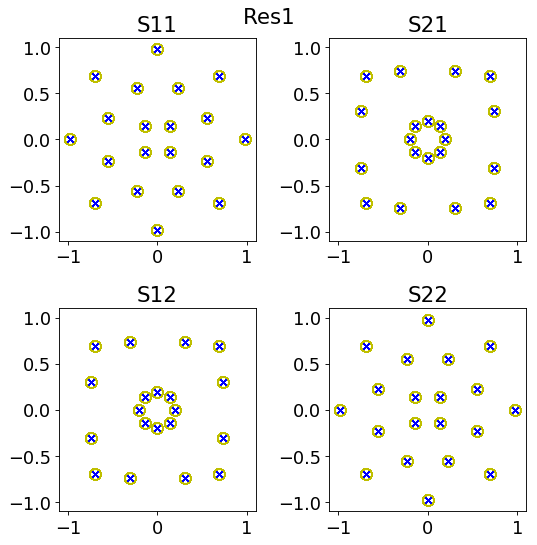

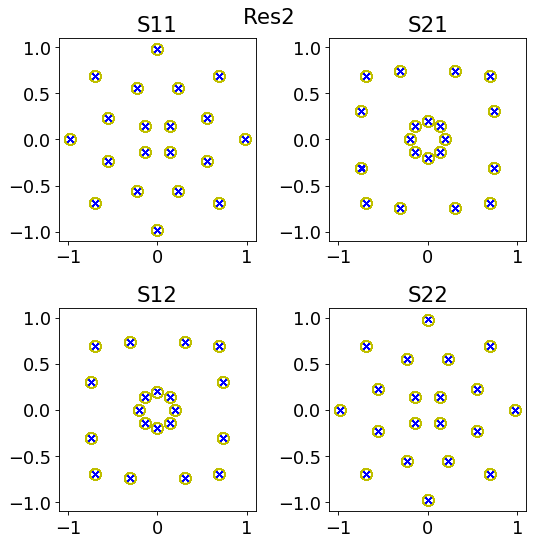

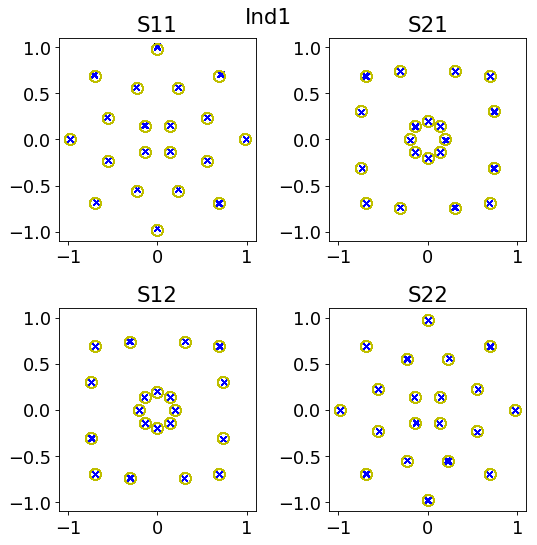

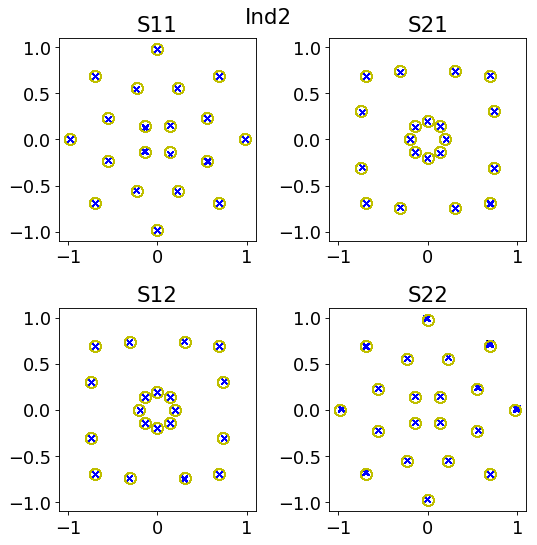

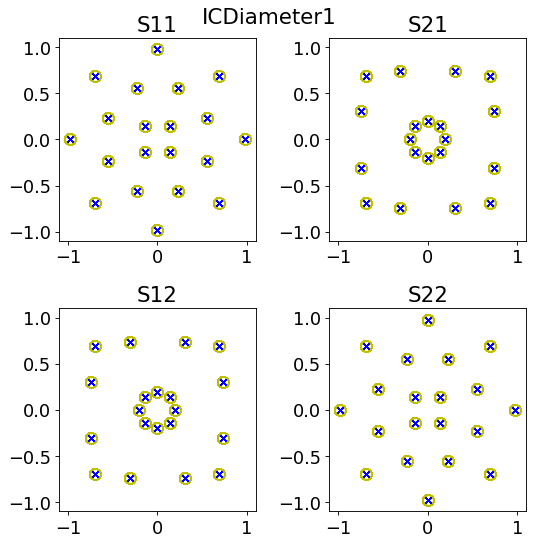

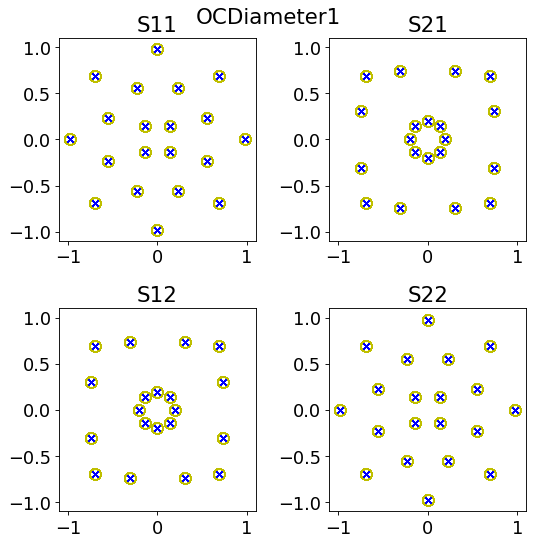

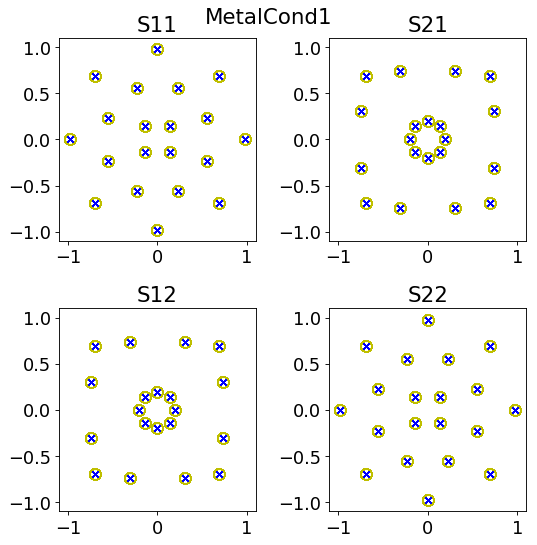

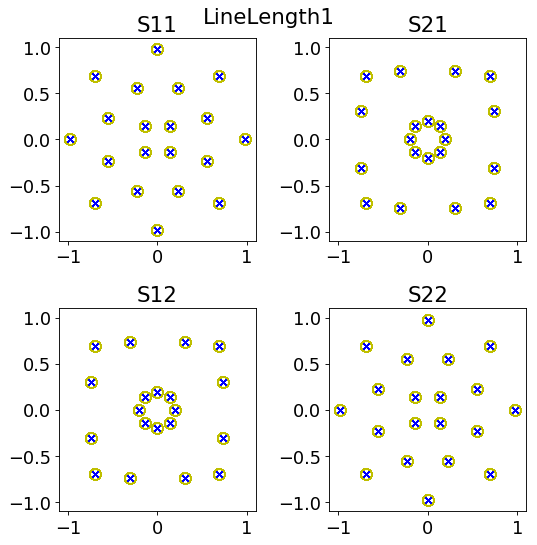

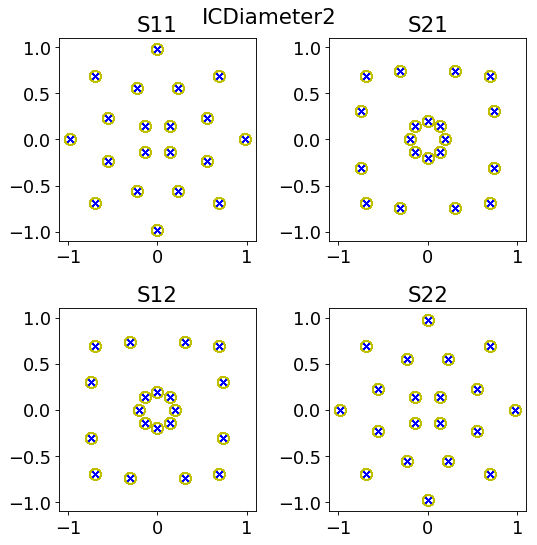

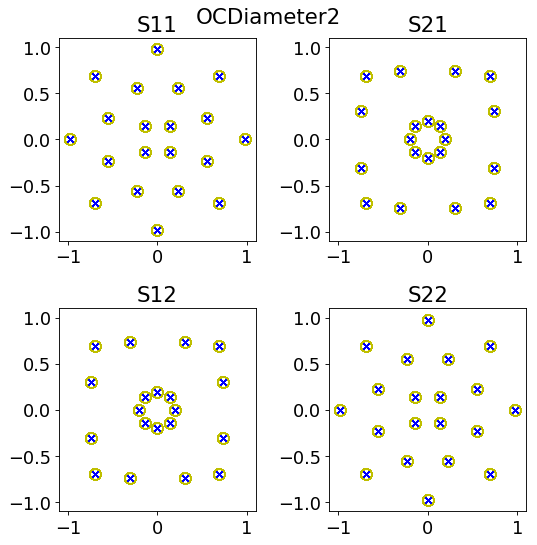

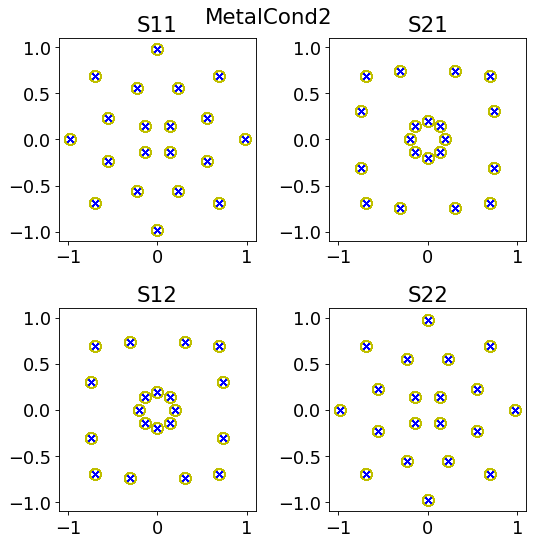

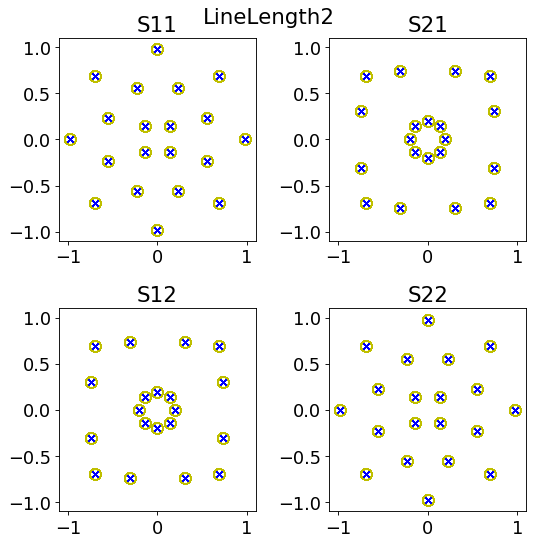

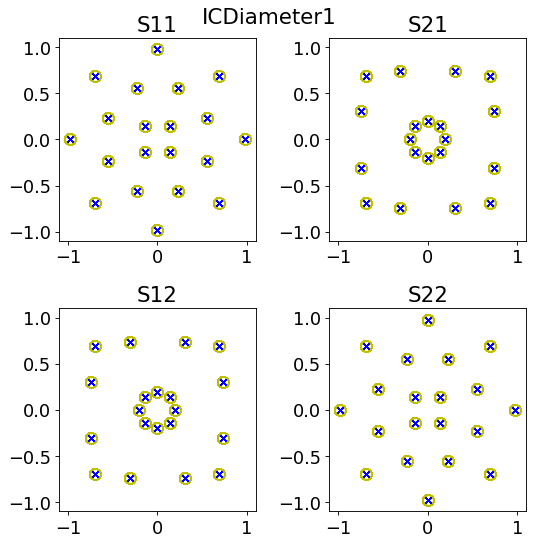

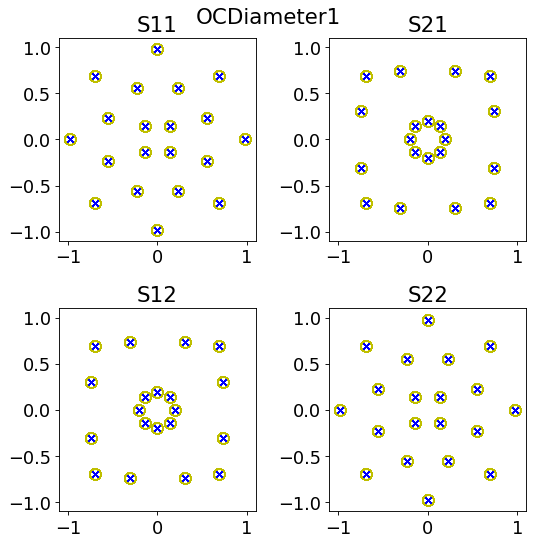

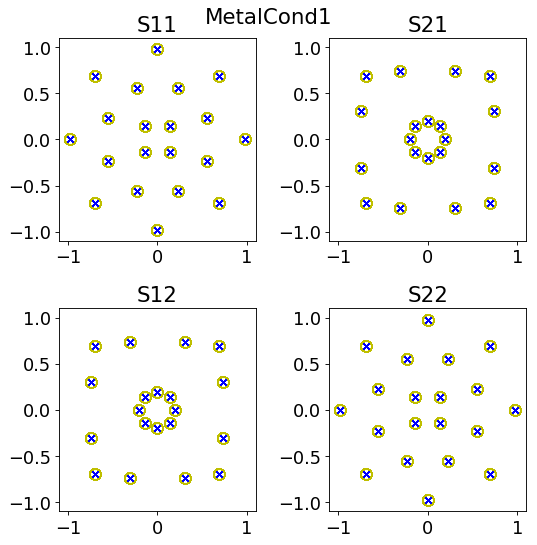

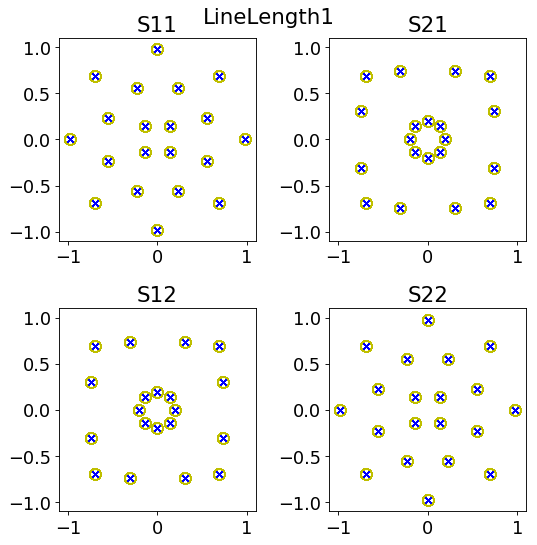

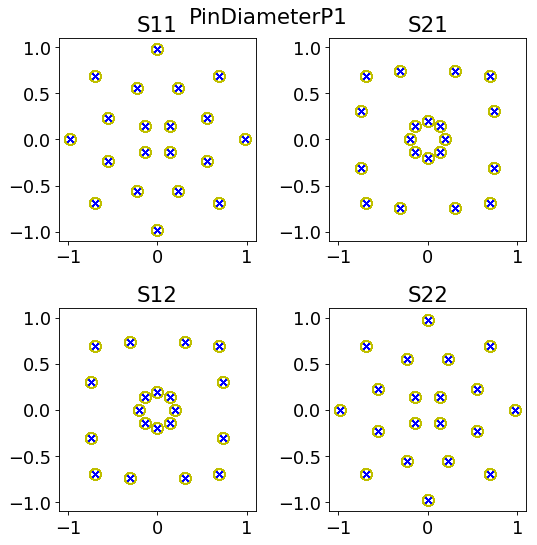

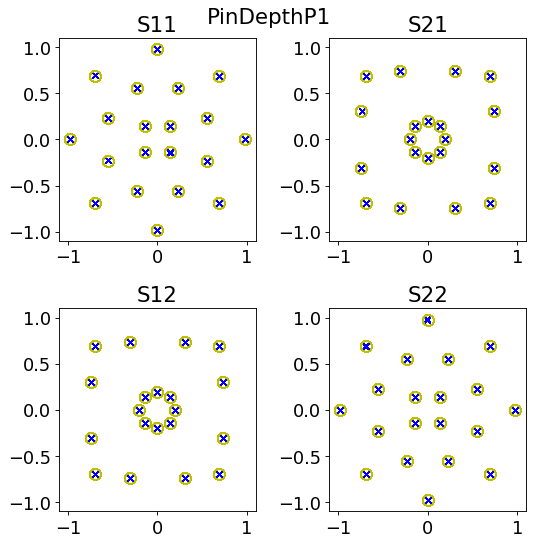

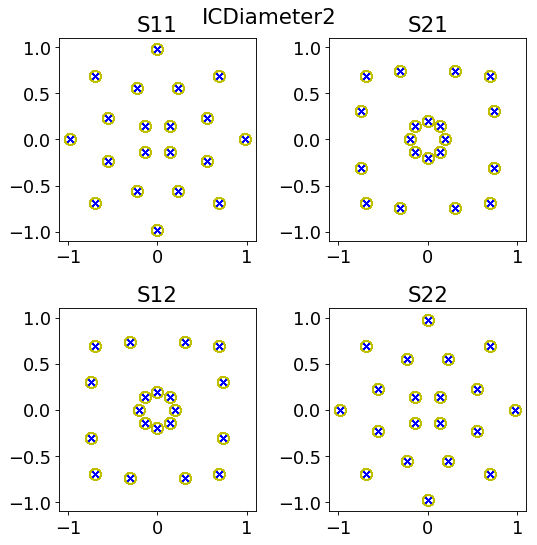

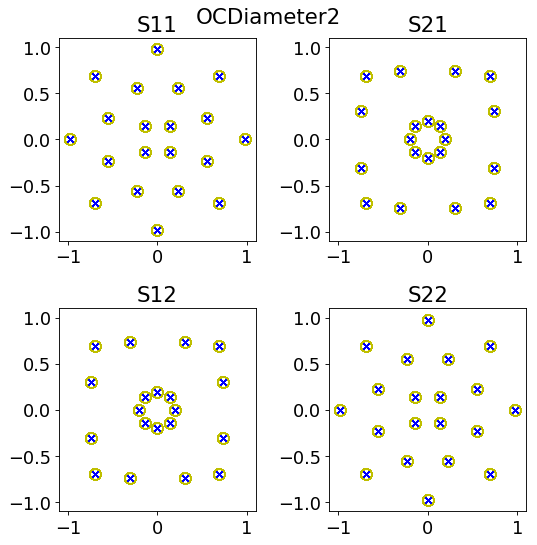

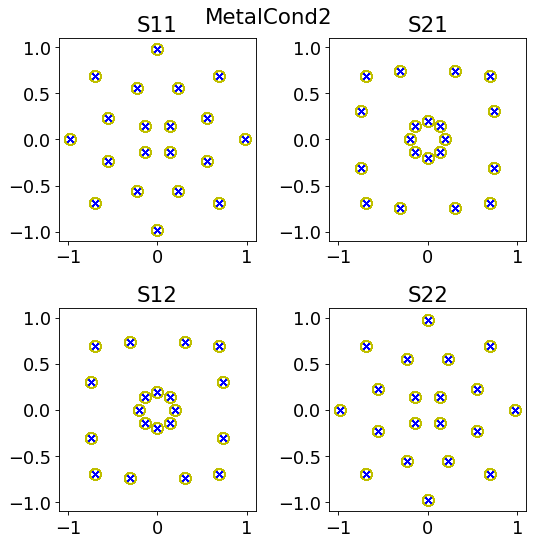

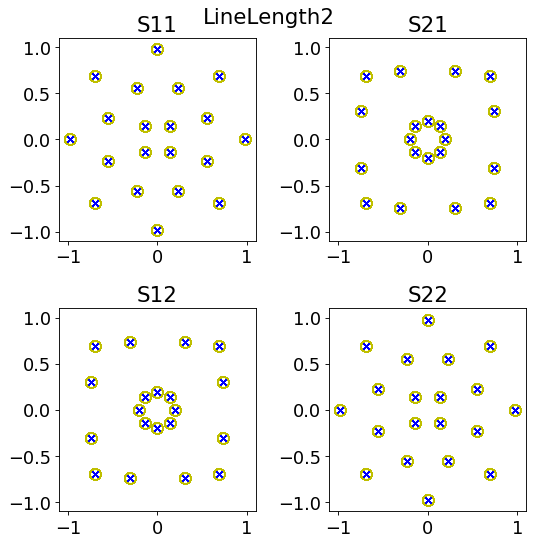

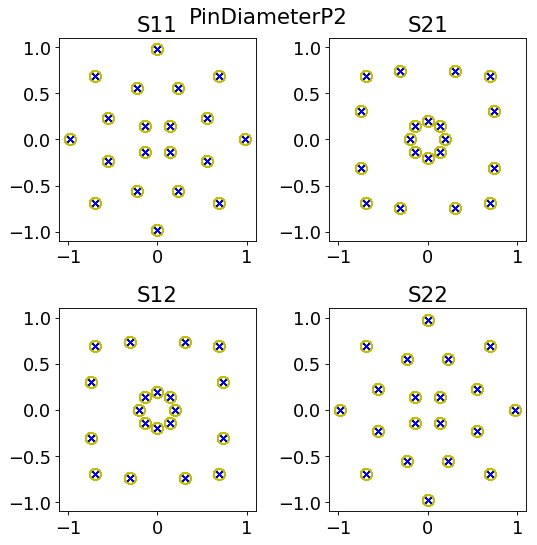

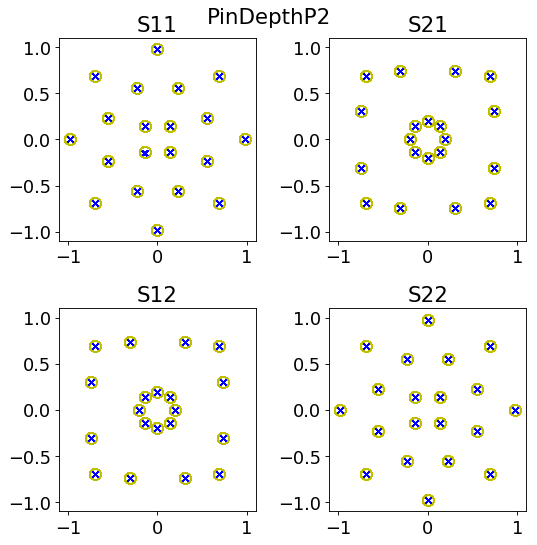

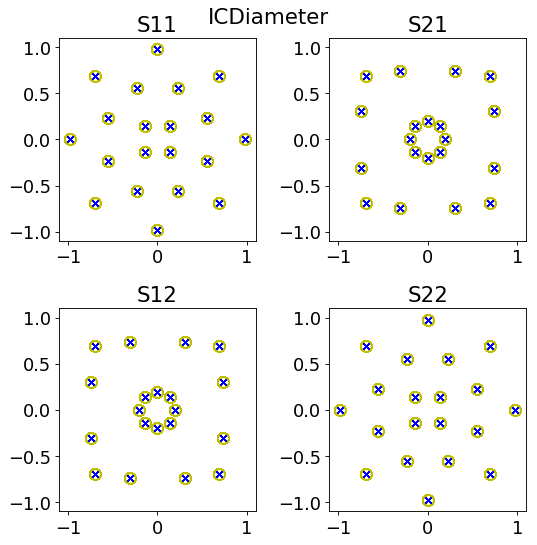

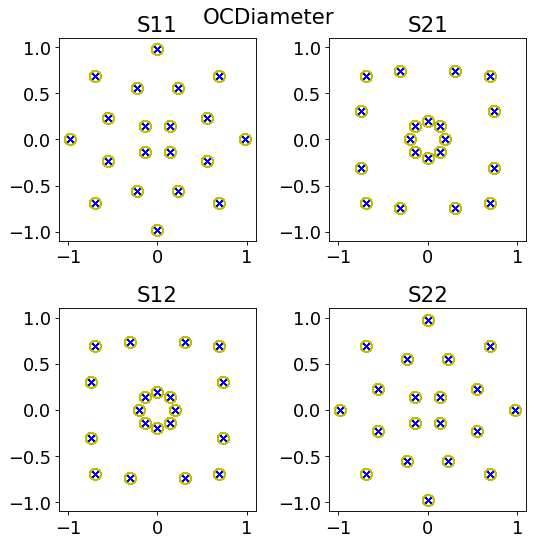

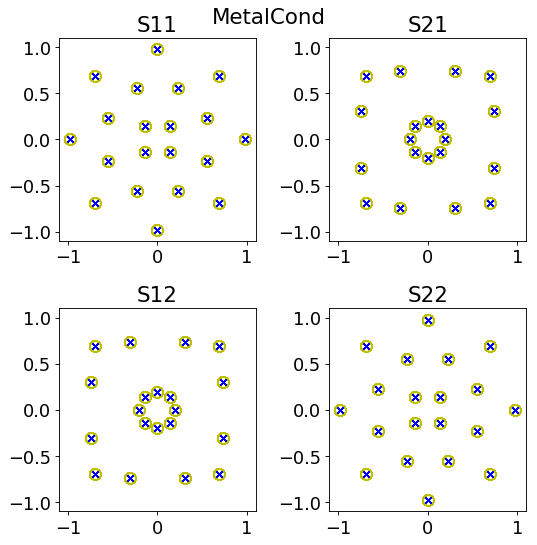

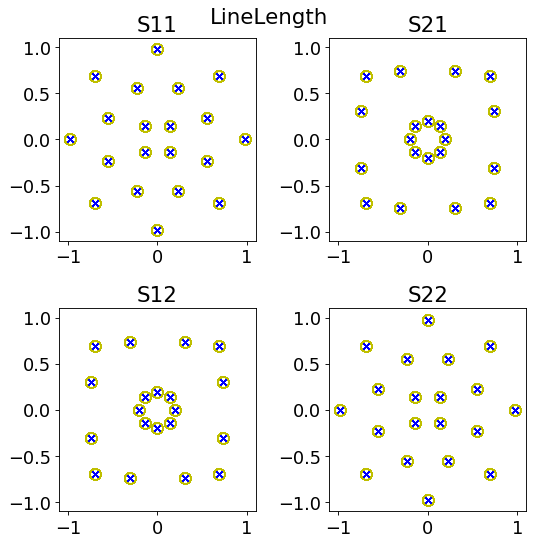

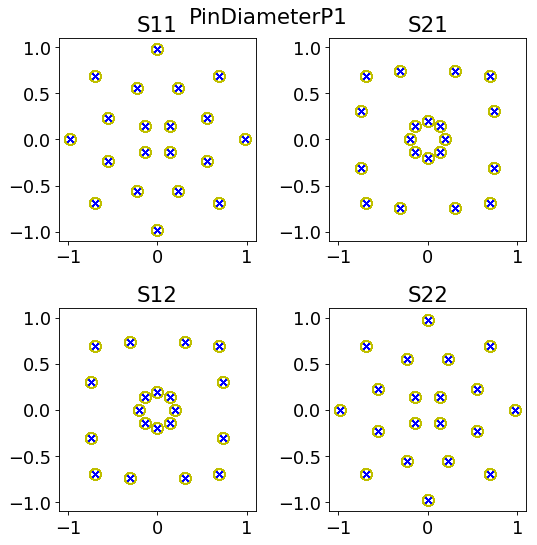

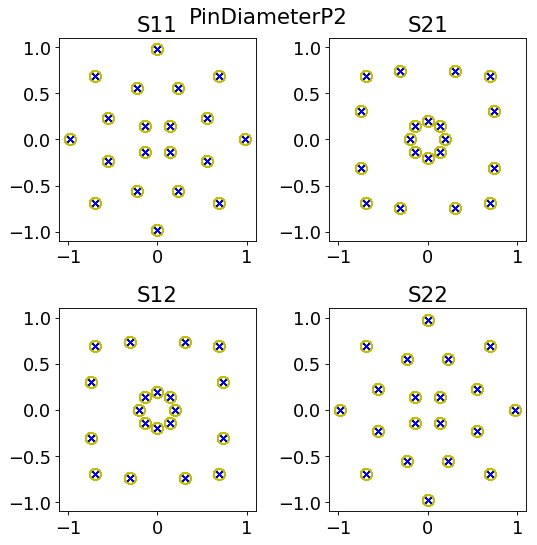

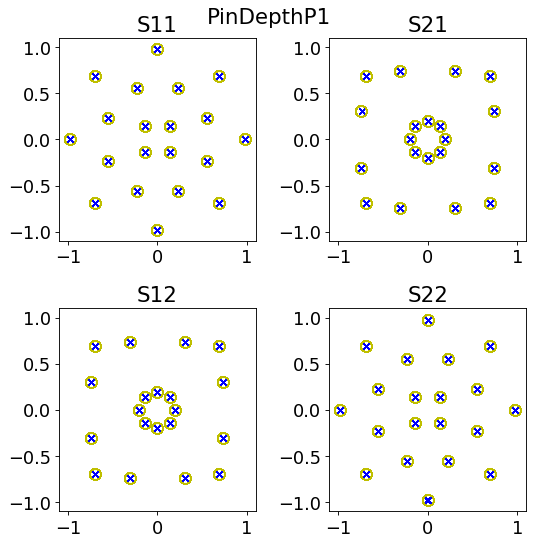

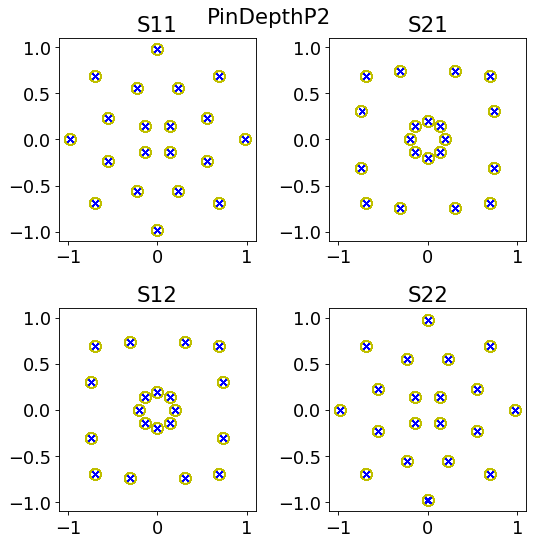

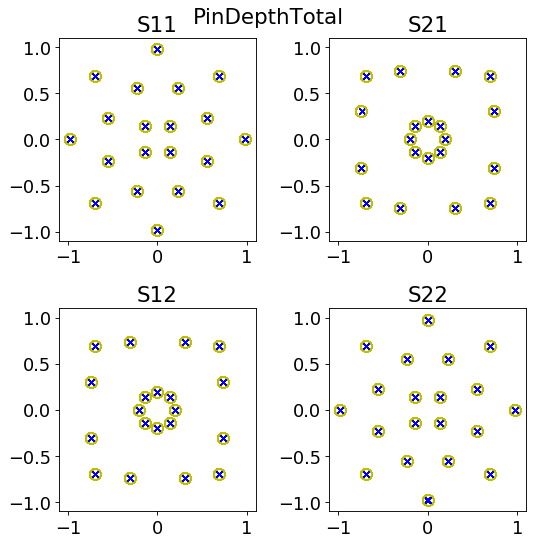

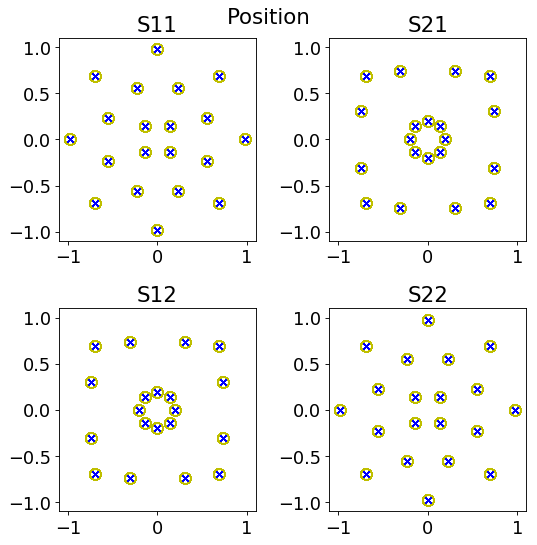

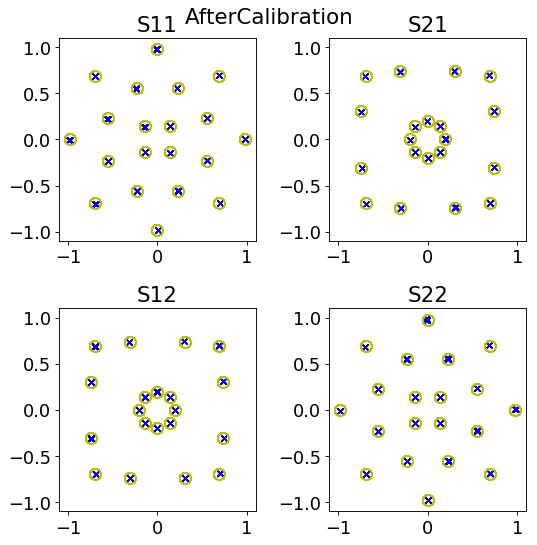

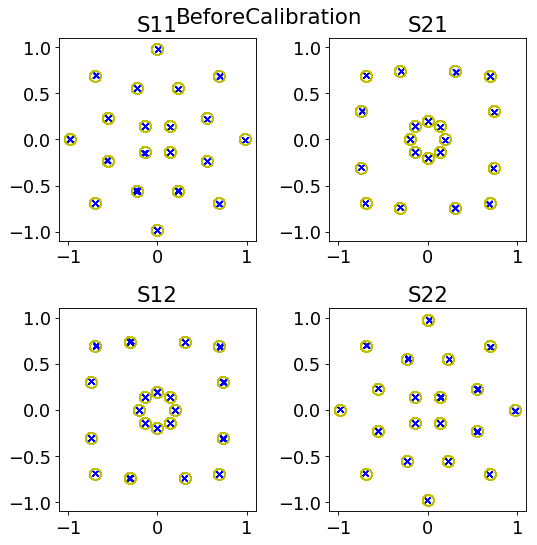

In [38]:
for index,covariance in enumerate(covariance_dictionary[:]):
    compare_calibrations_script(reference_correction,covaraiance_comparison_correction_list[index],
                                title=parameter_dictionary[covariance["name"]])

In [18]:
standards=["short","open","fixload","thru","gthru"]
cals=["cal1","cal2"]
dates=["20160822","20160824","20160825",
      "20160826","20160914","20160915",
      "20160916","20160919","20160920",
      "20160921","20160923","20160926"]
standard_measurements=[]
std_list=[]
for date in dates:
    date_list=[]
    try:
        for cal in cals:
            standard_dictionary={}
            for standard in standards:
                path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard)
                directory=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}".format(date,cal,standard)
                print("{0} is {1}".format("path",path))
                if os.path.split(path)[-1] in os.listdir(directory):

                    standard_dictionary[standard]=S2PV1(path)
                elif date is "20160926" and standard is "thru":
                    standard2=standard+"2_table"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)
                else: 
                    standard2=standard+"2"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)

            date_list.append(standard_dictionary)
        standard_measurements.append(date_list)
    except:raise
#         print("Passing Date {0} because of error".format(date))
#         new_dates=dates.remove(date)
    

path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160824\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_

In [73]:
standard_measurements

[[{'fixload': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x0000000119FAF288>,
   'gthru': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x0000000169EC6388>,
   'open': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x000000013471A3C8>,
   'short': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x000000016D087B48>,
   'thru': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x000000014C576308>},
  {'fixload': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x0000000069B0C508>,
   'gthru': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x0000000110036608>,
   'open': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x000000016B908448>,
   'short': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x00000001696AF3C8>,
   'thru': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x000000011461B548>}],
 [{'fixload': <Code.DataHandlers.TouchstoneModels.S2PV1 instance at 0x00000000E2CF3788>,
   'gthru': <Code.DataHandlers.Touchst

In [7]:
shorts=[measurement[0]["short"] for measurement in standard_measurements[:]]
opens=[measurement[0]["open"] for measurement in standard_measurements[:]]
loads=[measurement[0]["fixload"] for measurement in standard_measurements[:]]
thrus=[measurement[0]["thru"] for measurement in standard_measurements[:]]
gthrus=[measurement[0]["gthru"] for measurement in standard_measurements[:]]


In [110]:
plt.rcParams.update({'font.size': 12})
cal_name="cal1"
names=["shorts","opens","loads","thrus","gthrus"]
cal_data_list=[shorts,opens,loads,thrus,gthrus]
for index,data in enumerate(cal_data_list):
    compare_s2p_plots(data,plot_title=names[index],display_legend=False,format="MA",
                      directory=r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\Analysis\s2p plots fixed",
                     save_plot=True,specific_descriptor=names[index]+"_"+cal_name)

In [8]:
plt.rcParams.update({'font.size': 12})
cal_name="cal1"
names=["short","open","fixload","thru","gthru"]
cal_names=["cal1","cal2"]
for date_index,date in enumerate(dates):

    for cal_index,cal in enumerate(cal_names):
        
        for name_index,name in enumerate(names):
            reference_s2p=standard_measurements[0][0][name]
            compare_s2p=standard_measurements[date_index][cal_index][name]
            data=[reference_s2p,compare_s2p]
            labels=[dates[0],date]
            compare_s2p_plots(data,title=names[name_index]+" "+date,display_legend=True,format="MA",
                              directory=r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\Analysis\s2p plots fixed",
                             save_plot=True,specific_descriptor=names[name_index]+"_"+cal+"_"+date,
                             labels=labels)
            plt.close()

In [19]:

cal_name="cal1"
names=["short","open","fixload","thru","gthru"]
cal_names=["cal1","cal2"]
reference_correction=SNP(r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p")

for date_index,date in enumerate(dates):

    for cal_index,cal in enumerate(cal_names):
        print("Plotting {0} - {1} compare".format(date,cal))
        plt.rcParams.update({'font.size': 16})
        compare_calibrations_script(reference_correction,comparison_correction_list[date_index][cal_index],
                        title=date+" "+cal,save_plot=True,
                        directory=r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\Analysis\All together",
                        specific_descriptor=date+"_"+cal+"compare")
        plt.close()
        
        for name_index,name in enumerate(names):
            print("Plotting {0} - {1} - {2} s2ps".format(date,cal,name))
            plt.rcParams.update({'font.size': 12})
            reference_s2p=standard_measurements[0][0][name]
            compare_s2p=standard_measurements[date_index][cal_index][name]
            data=[reference_s2p,compare_s2p]
            labels=[dates[0],date]
            compare_s2p_plots(data,title=names[name_index]+" "+date,display_legend=True,format="MA",
                              directory=r"C:\Share\VNA_OSLT_TypeN_Room1207_2016\Analysis\All together",
                             save_plot=True,specific_descriptor=date+"_"+cal+"_"+names[name_index],
                             labels=labels)
            plt.close()

Plotting 20160822 - cal1 compare
Plotting 20160822 - cal1 - short s2ps
Plotting 20160822 - cal1 - open s2ps
Plotting 20160822 - cal1 - fixload s2ps
Plotting 20160822 - cal1 - thru s2ps
Plotting 20160822 - cal1 - gthru s2ps
Plotting 20160822 - cal2 compare
Plotting 20160822 - cal2 - short s2ps
Plotting 20160822 - cal2 - open s2ps
Plotting 20160822 - cal2 - fixload s2ps
Plotting 20160822 - cal2 - thru s2ps
Plotting 20160822 - cal2 - gthru s2ps
Plotting 20160824 - cal1 compare
Plotting 20160824 - cal1 - short s2ps
Plotting 20160824 - cal1 - open s2ps
Plotting 20160824 - cal1 - fixload s2ps
Plotting 20160824 - cal1 - thru s2ps
Plotting 20160824 - cal1 - gthru s2ps
Plotting 20160824 - cal2 compare
Plotting 20160824 - cal2 - short s2ps
Plotting 20160824 - cal2 - open s2ps
Plotting 20160824 - cal2 - fixload s2ps
Plotting 20160824 - cal2 - thru s2ps
Plotting 20160824 - cal2 - gthru s2ps
Plotting 20160825 - cal1 compare
Plotting 20160825 - cal1 - short s2ps
Plotting 20160825 - cal1 - open s2ps


In [86]:
cal=1
thrus=[]
for measurement in standard_measurements[:]:
    sorted_keys=sorted(measurement[cal].keys())
    thru_key=sorted_keys[-1]
    print(thru_key)
    thrus.append(measurement[cal][thru_key])

thru
thru
thru
thru
thru
thru
thru
thru
thru
thru
thru
short


In [37]:
comparison_correction_list=[]
dates=["Mean","20170804","20170809","20170810",
      "20170811","20170814","20170824",
      "20171006","20171011","20171012",
      "20171013","20171016","20171017"]
cal_names=["cal1","cal2"]
for date in dates:
    cal_list=[]
    for cal in cal_names:
        correction=SNP(r"C:\Share\VNA_OSLT_TypeN_OATS_2017\{0}\{1}\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p".format(date,cal))
        cal_list.append(correction)
    comparison_correction_list.append(cal_list)
standards=["short","open","fixload","thru","gthru"]
cals=["cal1","cal2"]

standard_measurements=[]
std_list=[]
for date in dates:
    date_list=[]
    try:
        for cal in cals:
            standard_dictionary={}
            for standard in standards:
                path=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\{0}\{1}\{2}.s2p".format(date,cal,standard)
                directory=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\{0}\{1}".format(date,cal,standard)
                print("{0} is {1}".format("path",path))
                if os.path.split(path)[-1] in os.listdir(directory):

                    standard_dictionary[standard]=S2PV1(path)
                elif date is "20160926" and standard is "thru":
                    standard2=standard+"2_table"
                    path=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)
                else: 
                    standard2=standard+"2"
                    path=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)

            date_list.append(standard_dictionary)
        standard_measurements.append(date_list)
    except:raise
#         print("Passing Date {0} because of error".format(date))
#         new_dates=dates.remove(date)
cal_name="cal1"
names=["short","open","fixload","thru","gthru"]
cal_names=["cal1","cal2"]
reference_correction=SNP(r"C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p")

for date_index,date in enumerate(dates):

    for cal_index,cal in enumerate(cal_names):
        print("Plotting {0} - {1} compare".format(date,cal))
        plt.rcParams.update({'font.size': 16})
        compare_calibrations_script(reference_correction,comparison_correction_list[date_index][cal_index],
                        title=date+" "+cal,save_plot=True,
                        directory=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\Analysis\All Together 2",
                        specific_descriptor=date+"_"+cal+"compare")
        plt.close()
        
        for name_index,name in enumerate(names):
            print("Plotting {0} - {1} - {2} s2ps".format(date,cal,name))
            plt.rcParams.update({'font.size': 12})
            reference_s2p=standard_measurements[0][0][name]
            compare_s2p=standard_measurements[date_index][cal_index][name]
            data=[reference_s2p,compare_s2p]
            labels=[dates[0],date]
            compare_s2p_plots(data,title=names[name_index]+" "+date,display_legend=True,format="MA",
                              directory=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\Analysis\All together 2",
                             save_plot=True,specific_descriptor=date+"_"+cal+"_"+names[name_index],
                             labels=labels)
            plt.close()

path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\short.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\open.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\fixload.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\thru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\gthru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal2\short.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal2\open.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal2\fixload.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal2\thru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\cal2\gthru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804\cal1\short.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804\cal1\open.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804\cal1\fixload.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804\cal1\thru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804\cal1\gthru.s2p
path is C:\Share\VNA_OSLT_TypeN_OATS_2017\20170804

In [23]:
help(s2p_mean)

Help on function s2p_mean in module Code.DataHandlers.TouchstoneModels:

s2p_mean(list_s2p_models, **options)
    Calculates the mean of the data of a list of
    s2p model and returns a new s2p model. The formats should be the same



In [24]:
shorts=[measurement[cal]["short"] for cal in range(2) for measurement in standard_measurements[:]]
opens=[measurement[cal]["open"] for cal in range(2) for measurement in standard_measurements[:]]
loads=[measurement[cal]["fixload"] for cal in range(2) for measurement in standard_measurements[:]]
thrus=[measurement[cal]["thru"] for cal in range(2) for measurement in standard_measurements[:]]
gthrus=[measurement[cal]["gthru"] for cal in range(2) for measurement in standard_measurements[:]]

In [34]:
map(lambda x:x.change_data_format("RI"),shorts)
mean_short=s2p_mean(shorts)

In [36]:
names=["short","open","fixload","thru","gthru"]
mean_standard_list=[shorts,opens,loads,thrus,gthrus]
mean_s2p=[]
for index,standard in enumerate(mean_standard_list):
    map(lambda x:x.change_data_format("RI"),standard)
    mean_standard=s2p_mean(standard)
    mean_standard.path=r"C:\Share\VNA_OSLT_TypeN_OATS_2017\Mean\{0}".format(names[index])
    mean_standard.save()
    mean_s2p.append(mean_standard)
    

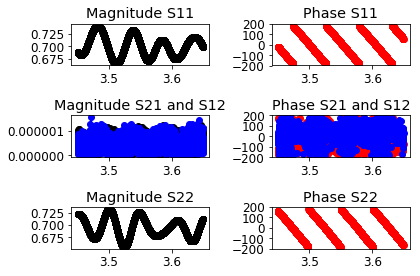

In [35]:
mean_short.show();

In [43]:
standards=["short","open","fixload","thru","gthru"]
cals=["cal1","cal2"]
dates=["20160822","20160824","20160825",
      "20160826","20160914","20160915",
      "20160916","20160919","20160920",
      "20160921","20160923","20160926"]
standard_measurements=[]
std_list=[]
for date in dates:
    date_list=[]
    try:
        for cal in cals:
            standard_dictionary={}
            for standard in standards:
                path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard)
                directory=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}".format(date,cal,standard)
                print("{0} is {1}".format("path",path))
                if os.path.split(path)[-1] in os.listdir(directory):

                    standard_dictionary[standard]=S2PV1(path)
                elif date is "20160926" and standard is "thru":
                    standard2=standard+"2_table"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)
                else: 
                    standard2=standard+"2"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)

            date_list.append(standard_dictionary)
        standard_measurements.append(date_list)
    except:raise
#         print("Passing Date {0} because of error".format(date))
#         new_dates=dates.remove(date)
    

path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal2\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160824\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_

In [44]:
shorts=[measurement[cal]["short"] for cal in range(2) for measurement in standard_measurements[:]]
opens=[measurement[cal]["open"] for cal in range(2) for measurement in standard_measurements[:]]
loads=[measurement[cal]["fixload"] for cal in range(2) for measurement in standard_measurements[:]]
thrus=[measurement[cal]["thru"] for cal in range(2) for measurement in standard_measurements[:]]
gthrus=[measurement[cal]["gthru"] for cal in range(2) for measurement in standard_measurements[:]]
names=["short","open","fixload","thru","gthru"]
mean_standard_list=[shorts,opens,loads,thrus,gthrus]
mean_s2p=[]
for index,standard in enumerate(mean_standard_list):
    map(lambda x:x.change_data_format("RI"),standard)
    mean_standard=s2p_mean(standard)
    mean_standard.path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\{0}.s2p".format(names[index])
    mean_standard.save()
    mean_s2p.append(mean_standard)

In [47]:
mean_s2p[0].options["sparameter_row_formatter_string"]=

'{0:.4g}{delimiter}{1:.4g}{delimiter}{2:.4g}{delimiter}{3:.4g}{delimiter}{4:.4g}{delimiter}{5:.4g}{delimiter}{6:.4g}{delimiter}{7:.4g}{delimiter}{8:.4g}'

In [49]:
for mean in mean_s2p:
    mean.options["sparameter_row_formatter_string"]=mean.options["sparameter_row_formatter_string"].replace(".4",".9")
    mean.save()

In [50]:
comparison_correction_list=[]
dates=["Mean","20160822","20160824","20160825",
      "20160826","20160914","20160915",
      "20160916","20160919","20160920",
      "20160921","20160923","20160926"]
cal_names=["cal1","cal2"]
for date in dates:
    cal_list=[]
    for cal in cal_names:
        correction=SNP(r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p".format(date,cal))
        cal_list.append(correction)
    comparison_correction_list.append(cal_list)
standards=["short","open","fixload","thru","gthru"]
cals=["cal1","cal2"]

standard_measurements=[]
std_list=[]
for date in dates:
    date_list=[]
    try:
        for cal in cals:
            standard_dictionary={}
            for standard in standards:
                path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard)
                directory=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}".format(date,cal,standard)
                print("{0} is {1}".format("path",path))
                if os.path.split(path)[-1] in os.listdir(directory):

                    standard_dictionary[standard]=S2PV1(path)
                elif date is "20160926" and standard is "thru":
                    standard2=standard+"2_table"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)
                else: 
                    standard2=standard+"2"
                    path=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\{0}\{1}\{2}.s2p".format(date,cal,standard2)
                    print("{0} is {1}".format("path",path))

                    if os.path.split(path)[-1] in os.listdir(directory):
                        standard_dictionary[standard]=S2PV1(path)

            date_list.append(standard_dictionary)
        standard_measurements.append(date_list)
    except:raise
#         print("Passing Date {0} because of error".format(date))
#         new_dates=dates.remove(date)
cal_name="cal1"
names=["short","open","fixload","thru","gthru"]
cal_names=["cal1","cal2"]
reference_correction=SNP(r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\OSLTMenuTypeN_vnauncert_Results\Solutions\Solution_0.s4p")

for date_index,date in enumerate(dates):

    for cal_index,cal in enumerate(cal_names):
        print("Plotting {0} - {1} compare".format(date,cal))
        plt.rcParams.update({'font.size': 16})
        compare_calibrations_script(reference_correction,comparison_correction_list[date_index][cal_index],
                        title=date+" "+cal,save_plot=True,
                        directory=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Analysis\All Together",
                        specific_descriptor=date+"_"+cal+"compare")
        plt.close()
        
        for name_index,name in enumerate(names):
            print("Plotting {0} - {1} - {2} s2ps".format(date,cal,name))
            plt.rcParams.update({'font.size': 12})
            reference_s2p=standard_measurements[0][0][name]
            compare_s2p=standard_measurements[date_index][cal_index][name]
            data=[reference_s2p,compare_s2p]
            labels=[dates[0],date]
            compare_s2p_plots(data,title=names[name_index]+" "+date,display_legend=True,format="MA",
                              directory=r"C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Analysis\All Together",
                             save_plot=True,specific_descriptor=date+"_"+cal+"_"+names[name_index],
                             labels=labels)
            plt.close()

path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal1\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal2\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal2\open.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal2\fixload.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal2\thru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\Mean\cal2\gthru.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\short.s2p
path is C:\Users\sandersa\Desktop\VNA_OSLT_TypeN_Room1207_2016\20160822\cal1\open.s